In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import cv2
import pathlib
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
url="/content/drive/MyDrive/malaria-cell-image/cell_images"

In [6]:
url=pathlib.Path(url)

In [7]:
data={"Parasitized":list(url.glob("Parasitized/*"))[:2000],
      "Uninfected":list(url.glob("Uninfected/*"))[:2000]}

In [8]:
import PIL

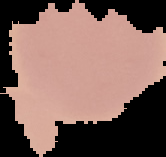

In [9]:
PIL.Image.open(data["Uninfected"][0])

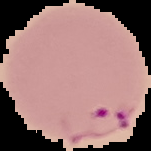

In [10]:
PIL.Image.open(data["Parasitized"][3])

In [11]:
len(data["Uninfected"])

2000

In [12]:
data_index={"Uninfected":0,
            "Parasitized":1}

In [13]:
x,y=[],[]
for nam,lis in data.items():
  for l in lis:
    img_array=cv2.imread(str(l))
    try:
      img_reshape=cv2.resize(img_array,dsize=(224,224))
    except:
      continue
    x.append(img_reshape)
    y.append(data_index[nam])

In [14]:
len(x)

3998

In [15]:
len(y)

3998

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
x=x/255

In [18]:
import tensorflow_hub as hub

In [19]:
model=keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/feature_vector/1",trainable=False,input_shape=(224,224,3)),
        keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="BinaryCrossentropy",
    metrics=["accuracy"]
)
model.fit(x,y,epochs=20)

Epoch 1/20
125/125 [==============================] - 51s 110ms/step - loss: 0.4400 - accuracy: 0.8019
Epoch 2/20
125/125 [==============================] - 13s 104ms/step - loss: 0.2143 - accuracy: 0.9237
Epoch 3/20
125/125 [==============================] - 13s 104ms/step - loss: 0.1965 - accuracy: 0.9287
Epoch 4/20
125/125 [==============================] - 13s 105ms/step - loss: 0.1810 - accuracy: 0.9316
Epoch 5/20
125/125 [==============================] - 13s 104ms/step - loss: 0.1870 - accuracy: 0.9373
Epoch 6/20
125/125 [==============================] - 13s 103ms/step - loss: 0.1601 - accuracy: 0.9415
Epoch 7/20
125/125 [==============================] - 13s 104ms/step - loss: 0.1583 - accuracy: 0.9425
Epoch 8/20
125/125 [==============================] - 13s 104ms/step - loss: 0.1496 - accuracy: 0.9520
Epoch 9/20
125/125 [==============================] - 13s 105ms/step - loss: 0.1379 - accuracy: 0.9525
Epoch 10/20
125/125 [==============================] - 13s 105ms/step - l

In [21]:
test_data={"Parasitized":list(url.glob("Parasitized/*"))[2000:2100],
           "Uninfected":list(url.glob("Uninfected/*"))[2000:2100]}

In [23]:
len(test_data["Parasitized"])

100

In [24]:
x_test,y_test=[],[]
for name,listt in test_data.items():
  for i in listt:
    img_arra=cv2.imread(str(i))
    img_res=cv2.resize(img_arra,(224,224))
    x_test.append(img_res)
    y_test.append(data_index[name])

In [25]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [26]:
x_test=x_test/255

In [27]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 190ms/step - loss: 0.1762 - accuracy: 0.9250


[0.17622463405132294, 0.925000011920929]

In [28]:
y_predict=model.predict(x_test)

In [30]:
y_pred=[]
for j in y_predict:
  if j[0]<0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [31]:
from sklearn import metrics

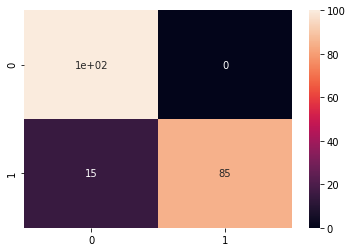

In [36]:
sb.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [37]:
model.save_weights("malaria.h5")

In [38]:
file=open("malaria.json","w")
file.write(model.to_json())
file.close()

In [39]:
from google.colab import files

In [40]:
files.download("/content/malaria.h5")
files.download("/content/malaria.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>